In [1]:
# Surpress any warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import numpy as np
import cv2 as cv
from sklearn.cluster import MeanShift, estimate_bandwidth
from mpl_toolkits import mplot3d
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

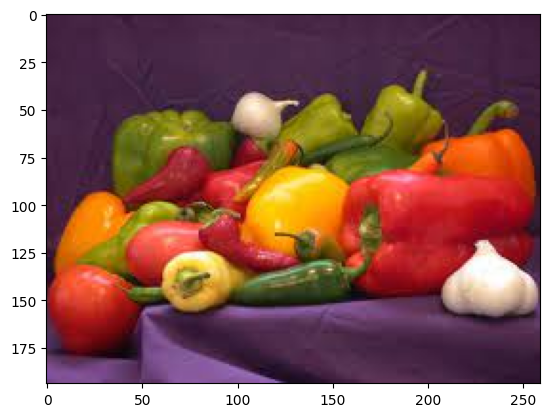

In [2]:
img=cv.imread('/content/drive/MyDrive/DataSets/peppers.jpeg')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()


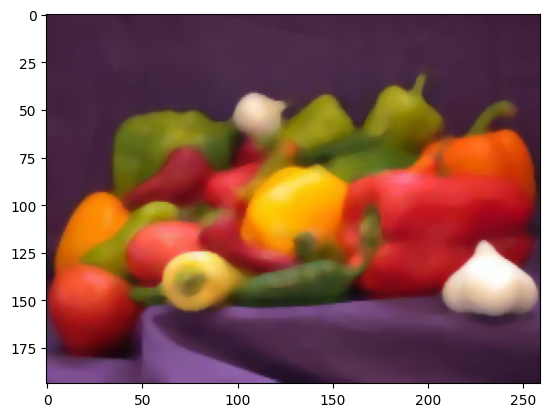

In [3]:
img = cv.medianBlur(img, 7)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

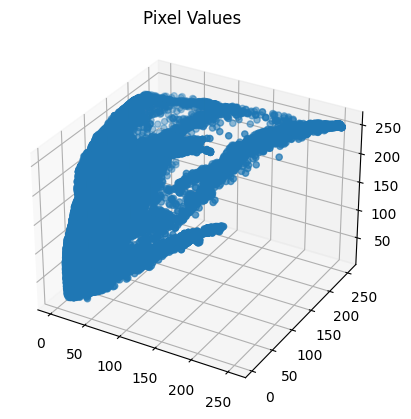

In [4]:
ax = plt.axes(projection ="3d")
ax.scatter3D(img[:,:,0],img[:,:,1],img[:,:,2])
ax.set_title('Pixel Values ')
plt.show()

In [5]:
 img.shape

(194, 259, 3)

In [6]:
X = img.reshape((-1,3))
print("shape: ",X.shape)
print("data type   : ",X.dtype)

shape:  (50246, 3)
data type   :  uint8


In [7]:
X = np.float32(X)

In [8]:
bandwidth = estimate_bandwidth(X, quantile=.06, n_samples=3000)
bandwidth

33.51403269933768

In [9]:
ms = MeanShift(bandwidth=bandwidth,bin_seeding=True)
ms.fit(X)

MeanShift(bandwidth=33.51403269933768, bin_seeding=True)

In [10]:
labeled=ms.labels_
labeled

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
clusters=ms.predict(X)
clusters

array([0, 0, 0, ..., 0, 0, 0])

In [12]:
np.unique(labeled)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [13]:
ms.cluster_centers_

array([[ 67.19606 ,  37.927944,  70.074814],
       [ 32.38643 ,  29.431494, 173.7524  ],
       [ 25.335648,  94.10284 ,  98.0142  ],
       [ 25.08942 , 130.47505 , 141.56128 ],
       [127.69194 ,  73.29858 , 115.98683 ],
       [ 14.098269,  95.66574 , 230.2173  ],
       [  9.878764, 132.11331 , 245.06735 ],
       [  8.750482, 182.74567 , 251.81984 ],
       [158.78459 , 185.80435 , 217.75691 ],
       [191.184   , 215.884   , 241.426   ],
       [240.2958  , 246.98953 , 251.78273 ],
       [ 88.08382 , 214.68497 , 249.59248 ]], dtype=float32)

In [14]:
cluster_int8=np.uint8(ms.cluster_centers_)
cluster_int8

array([[ 67,  37,  70],
       [ 32,  29, 173],
       [ 25,  94,  98],
       [ 25, 130, 141],
       [127,  73, 115],
       [ 14,  95, 230],
       [  9, 132, 245],
       [  8, 182, 251],
       [158, 185, 217],
       [191, 215, 241],
       [240, 246, 251],
       [ 88, 214, 249]], dtype=uint8)

In [15]:
ms.predict(X)

array([0, 0, 0, ..., 0, 0, 0])

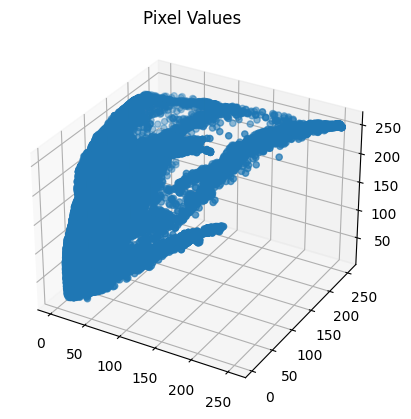

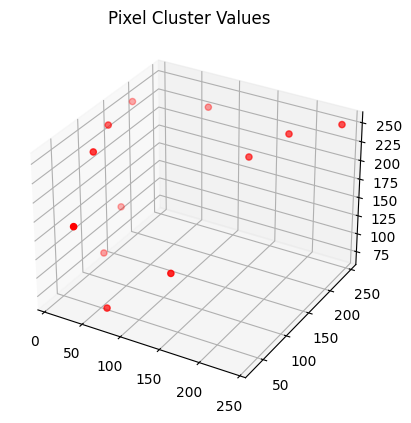

In [16]:
ax = plt.axes(projection ="3d")
ax.scatter3D(img[:,:,0],img[:,:,1],img[:,:,2])
ax.set_title('Pixel Values ')
plt.show()

ax = plt.axes(projection ="3d")
ax.set_title('Pixel Cluster Values  ')
ax.scatter3D(cluster_int8[:,0],cluster_int8[:,1],cluster_int8[:,2],color='red')
plt.show()

In [17]:
result=np.zeros(X.shape,dtype=np.uint8)

for label in np.unique(labeled):
    result[labeled==label,:]=cluster_int8[label,:]


result=result.reshape(img.shape)

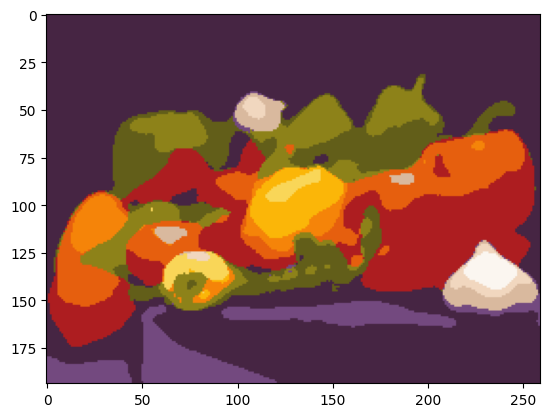

In [18]:
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.show()

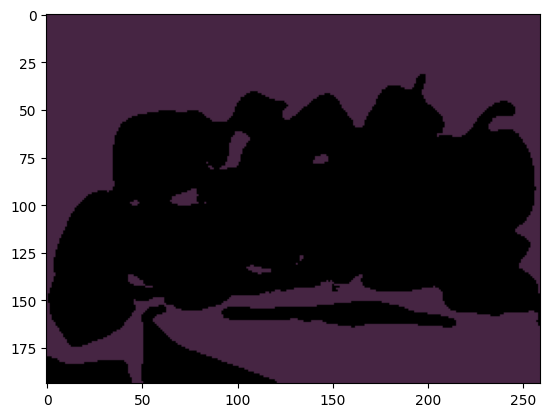

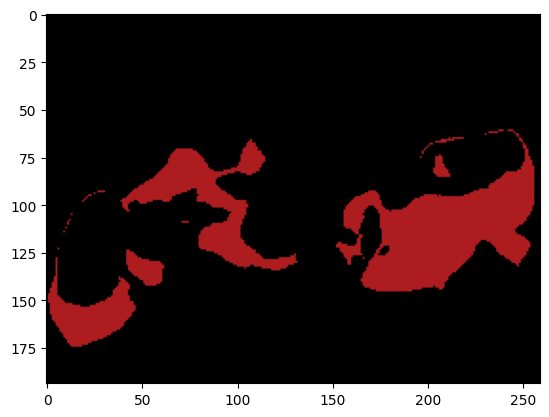

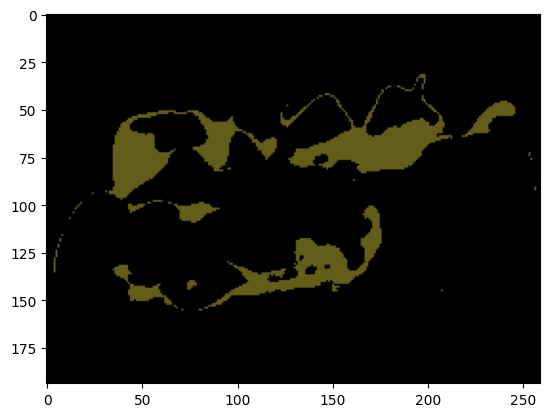

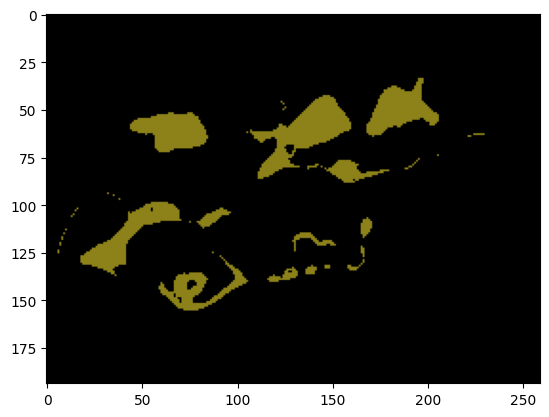

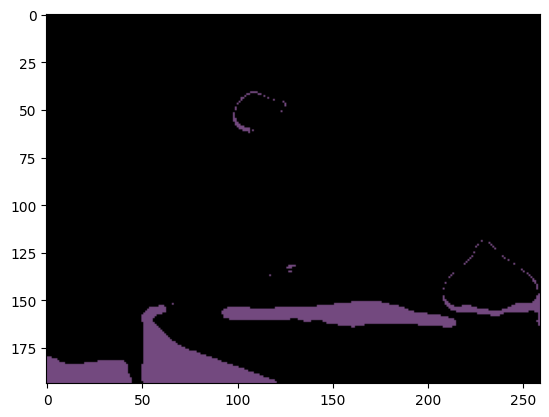

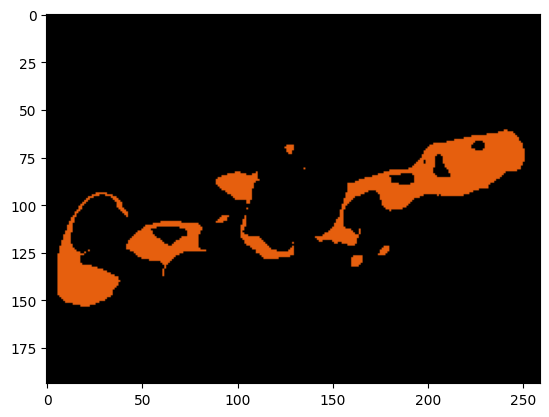

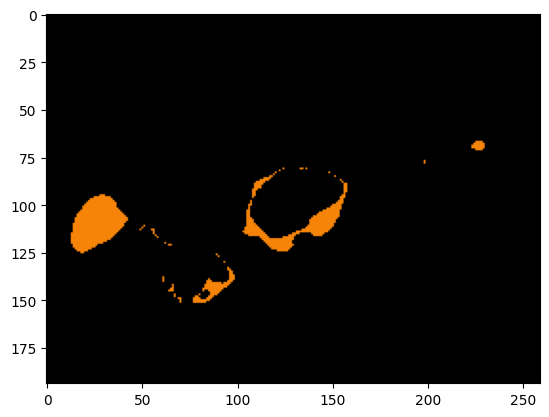

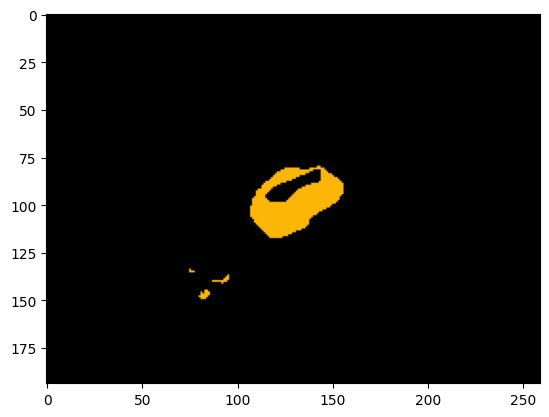

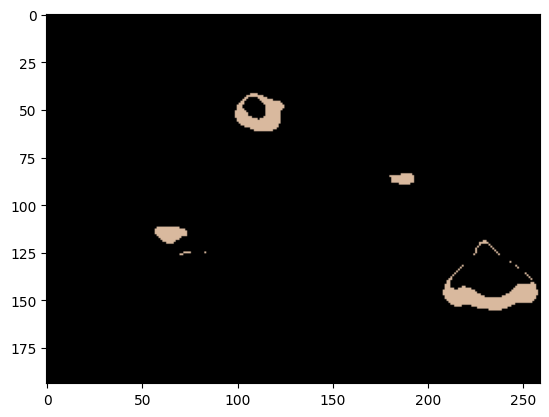

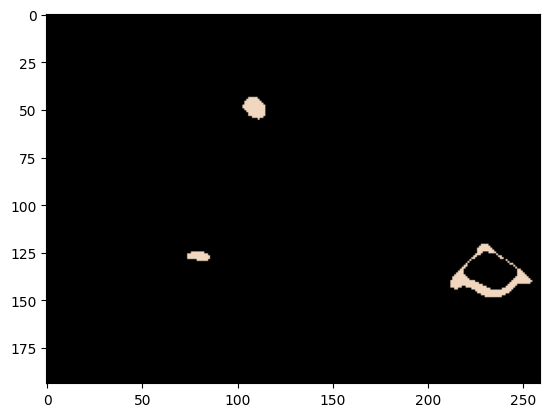

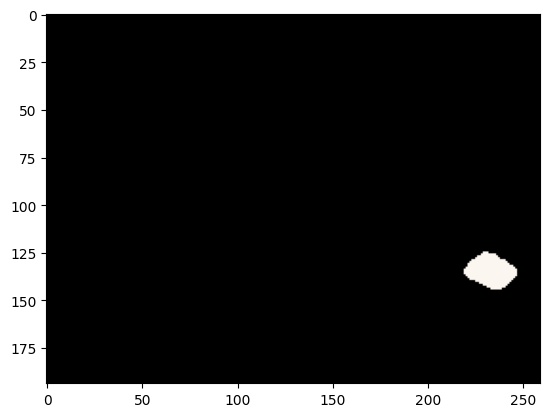

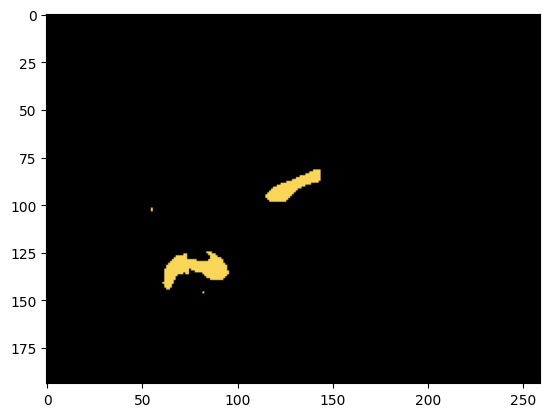

In [19]:
for label in np.unique(labeled):
    result=np.zeros(X.shape,dtype=np.uint8)
    result[labeled==label,:]=cluster_int8[label,:]
    plt.imshow(cv.cvtColor(result.reshape(img.shape), cv.COLOR_BGR2RGB))
    plt.show()

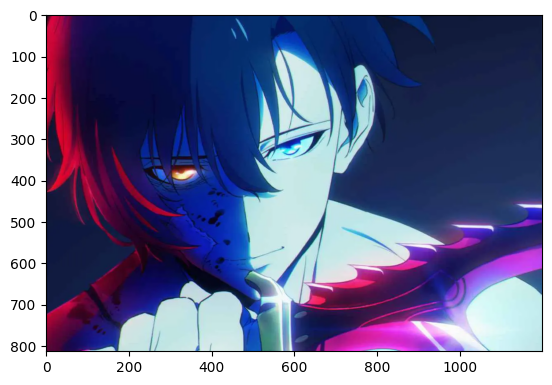

In [20]:
img=cv.imread('/content/drive/MyDrive/DataSets/solo-leveling.jpg.webp')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

In [21]:
img=cv.medianBlur(img,7)

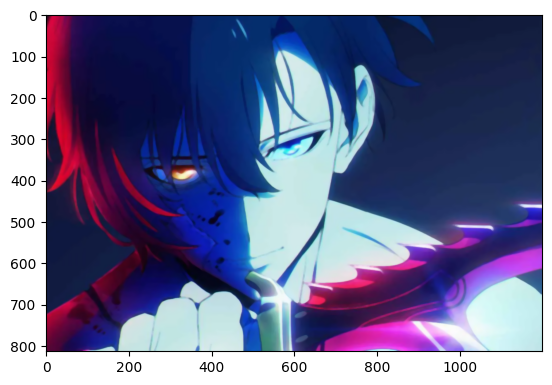

In [22]:
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

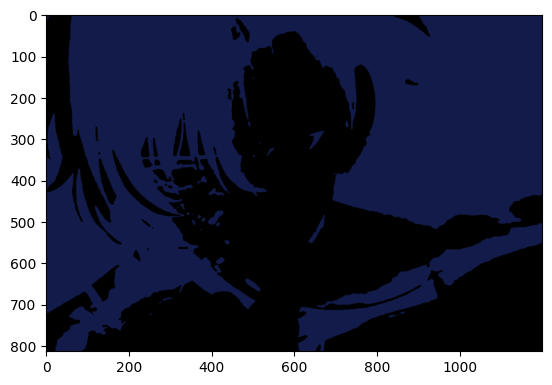

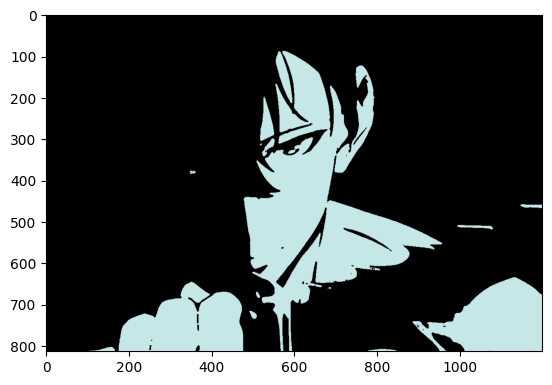

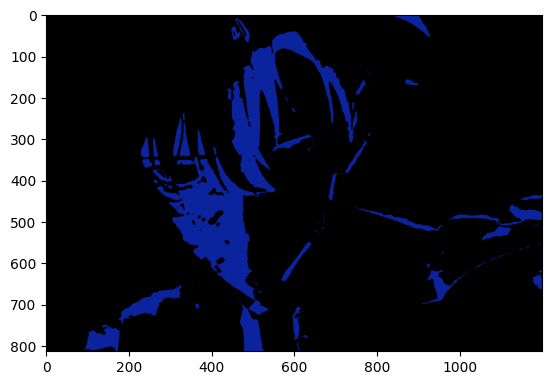

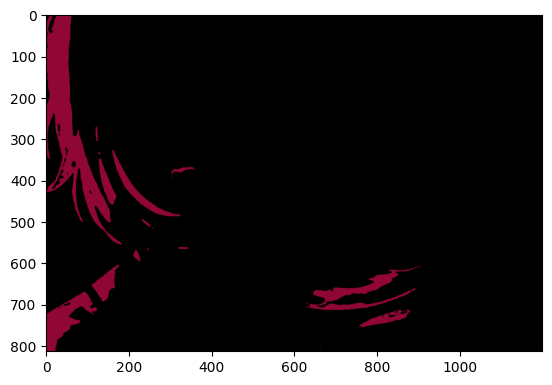

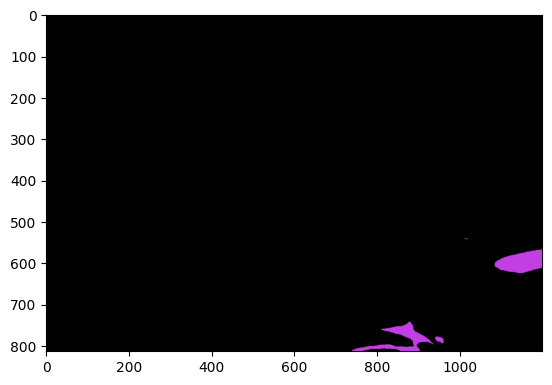

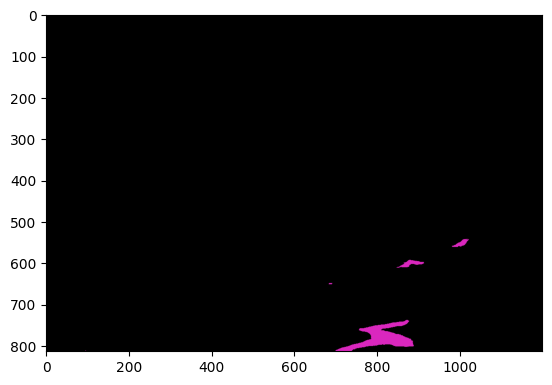

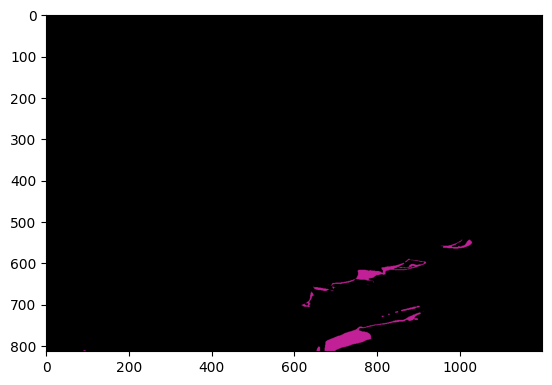

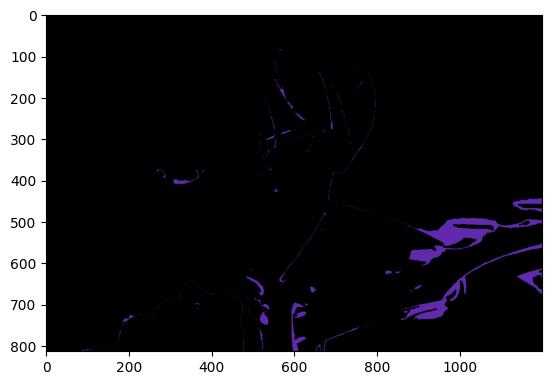

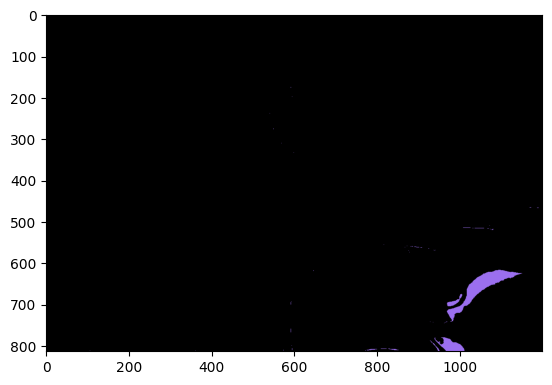

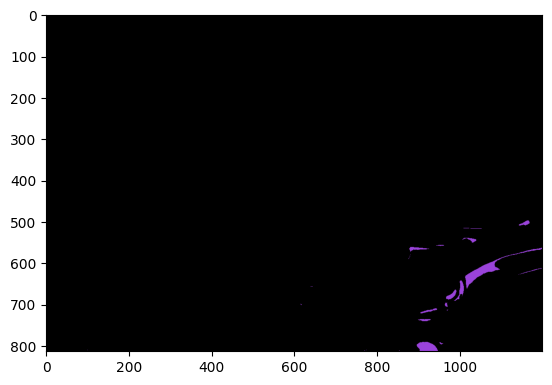

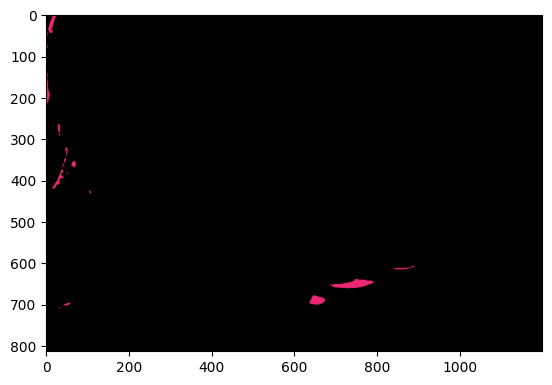

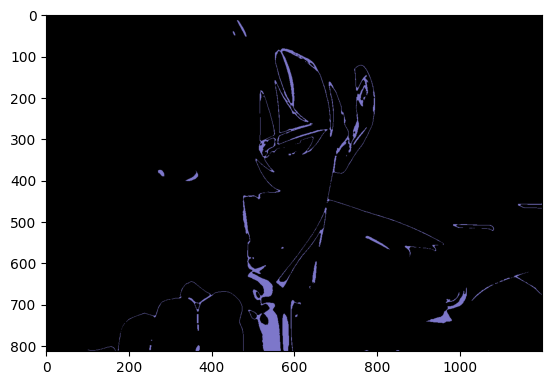

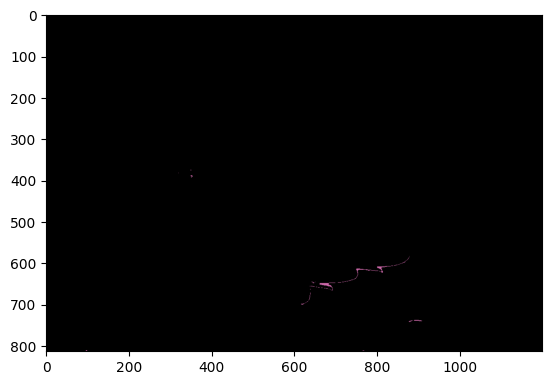

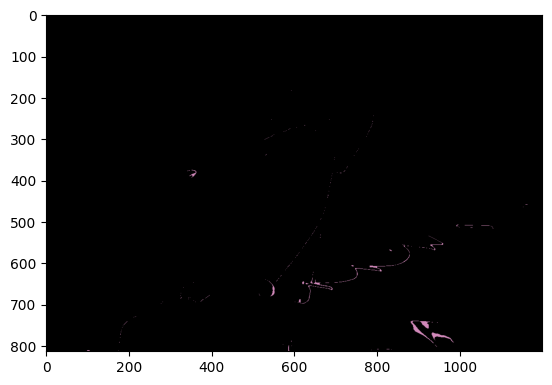

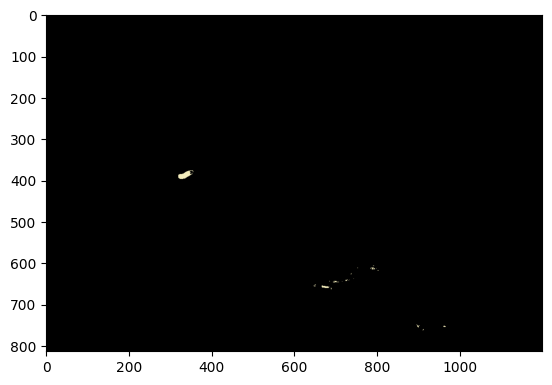

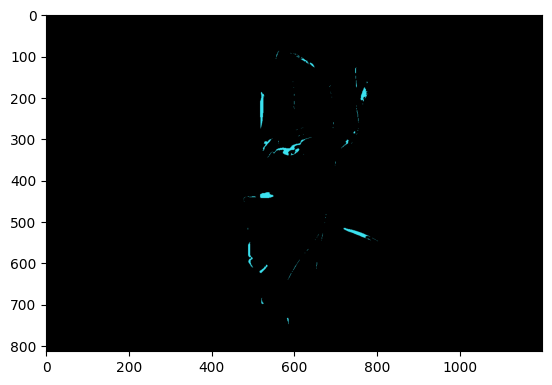

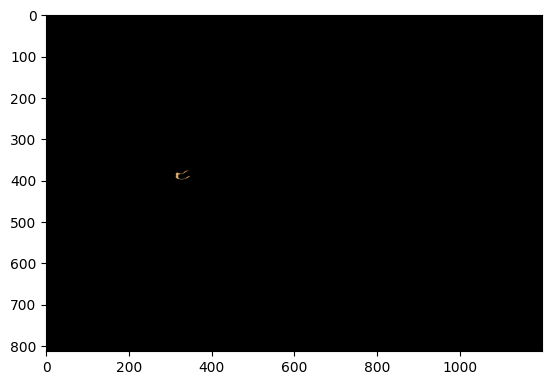

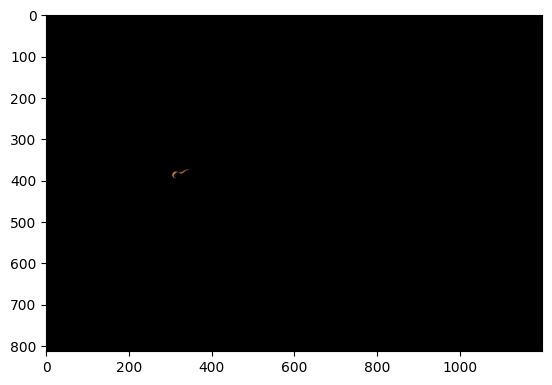

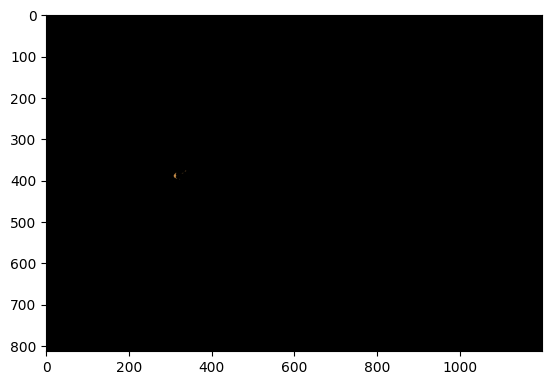

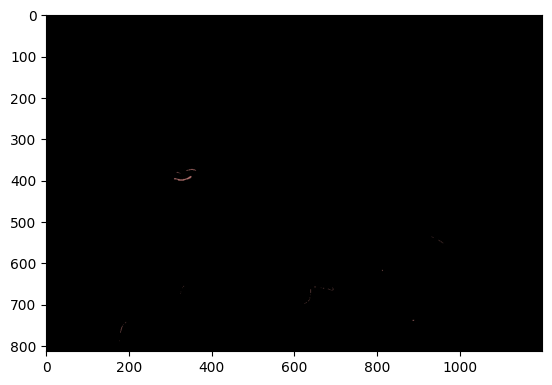

In [23]:
X = img.reshape((-1,3))
X = np.float32(X)
bandwidth = estimate_bandwidth(X, quantile=.06, n_samples=3000)
ms = MeanShift(bandwidth=bandwidth,bin_seeding=True)
ms.fit(X)
labeled=ms.labels_
cluster_int8=np.uint8(ms.cluster_centers_)
result=np.zeros(X.shape,dtype=np.uint8)
labeled=ms.labels_
result=np.zeros(X.shape,dtype=np.uint8)

for label in np.unique(labeled):
    result[labeled==label,:]=cluster_int8[label,:]

    cluster_int8[label]
result=result.reshape(img.shape)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))

for label in np.unique(labeled):
    result=np.zeros(X.shape,dtype=np.uint8)
    result[labeled==label,:]=cluster_int8[label,:]
    plt.imshow(cv.cvtColor(result.reshape(img.shape), cv.COLOR_BGR2RGB))
    plt.show()

In [24]:
df = pd.read_csv("/content/drive/MyDrive/DataSets/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
df=df.drop(columns=['Name','Ticket','Cabin','PassengerId','Embarked'])

In [26]:
df.loc[df['Sex']!='male','Sex']=0
df.loc[df['Sex']=='male','Sex']=1

In [27]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [28]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [29]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [30]:
X=df.drop(columns=['Survived'])

In [31]:
X=df.apply(lambda x: (x-x.mean())/(x.std()+0.0000001), axis=0)

In [32]:
bandwidth = estimate_bandwidth(X)
ms = MeanShift(bandwidth=bandwidth , bin_seeding=True)
ms.fit(X)

MeanShift(bandwidth=2.6395838673142666, bin_seeding=True)

In [33]:
X['cluster']=ms.labels_
df['cluster']=ms.labels_

In [34]:
df.groupby('cluster').mean().sort_values(by=['Survived'], ascending=False)

,Survived,Pclass,Age,SibSp,Parch,Fare
cluster,,,,,,
5,1.000000,1.000000,35.333333,0.000000,0.333333,512.329200
4,0.750000,1.000000,27.822048,0.857143,1.250000,195.894643
0,0.381313,2.313131,30.734477,0.285354,0.199495,23.992865
3,0.307692,2.846154,38.692308,0.769231,4.230769,29.377562
1,0.260870,2.913043,8.745575,3.239130,1.543478,30.968026
2,0.000000,3.000000,29.699118,8.000000,2.000000,69.550000
6,0.000000,1.000000,61.000000,0.500000,3.000000,188.137500


In [35]:
def gaussian(d, h):
    return np.exp(-0.5*((d/h))**2) / (h*math.sqrt(2*math.pi))

In [36]:
s=1 # a sample point

x = np.linspace(-2, 4, num=200)
dist=np.sqrt(((x-s)**2))
kernel_1=gaussian(dist, 1)
kernel_2=gaussian(dist, 3)

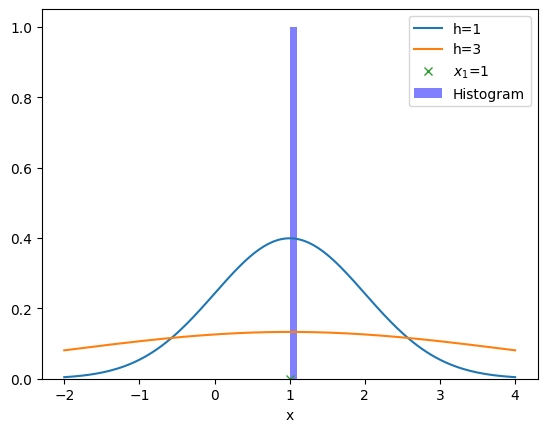

In [37]:
plt.plot(x,kernel_1,label='h=1')
plt.plot(x,kernel_2,label='h=3')
plt.plot(s,0,'x',label="$x_{1}$=1")
plt.hist(s, 10, facecolor='blue', alpha=0.5,label="Histogram")
plt.xlabel('x')
plt.legend()
plt.show()

In [38]:
def kernel_density(S,x,h=1):

    density=np.zeros((200))
    for s in S:
        #Determine the distance and kernel for each point
        dist=np.sqrt(((x-s)**2))
        kernel=gaussian(dist, h)
        #Find the sum
        density+=kernel
    #Normalize the sum
    density=density/density.sum()

    return density

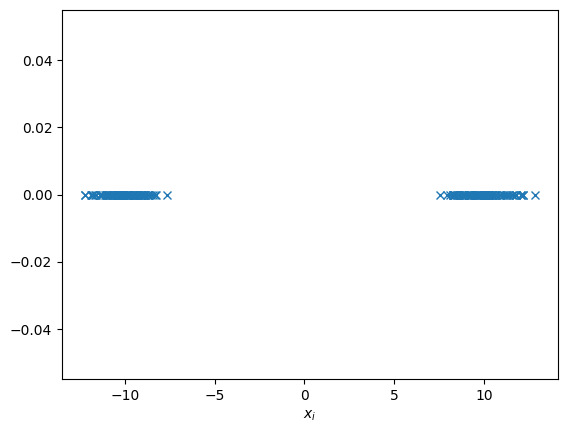

In [39]:
S=np.zeros((200))
S[0:100] = np.random.normal(-10, 1, 100)
S[100:200]=np.random.normal(10, 1, 100)
plt.plot(S,np.zeros((200)),'x')
plt.xlabel("$x_{i}$")
plt.show()

In [40]:
x = np.linspace(S.min()-3, S.max()+3, num=200)
density=kernel_density(S,x)

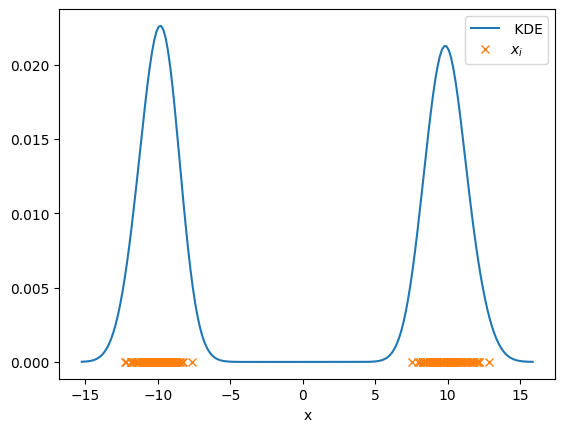

In [41]:
plt.plot(x,density,label=" KDE")
plt.plot(S,np.zeros((200,1)),'x',label="$x_{i}$")
plt.xlabel('x')
plt.legend()
plt.show()

In [42]:
mean_shift=((density.reshape(-1,1)*S).sum(0) / density.sum())-x

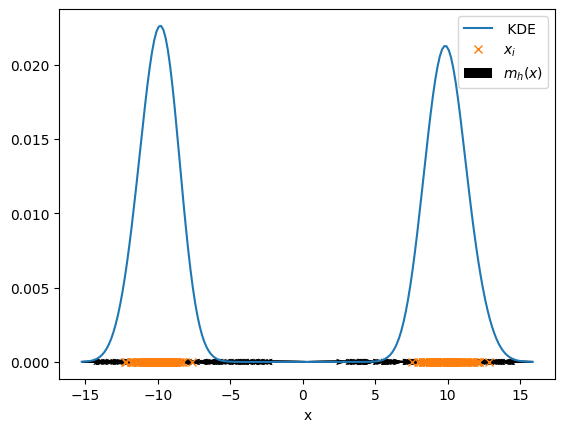

In [43]:
plt.plot(x,density,label=" KDE")
plt.plot(S,np.zeros((200,1)),'x',label="$x_{i}$")
plt.quiver(x, np.zeros((200,1)),mean_shift, np.zeros((200,1)), units='width',label="$m_{h}(x)$")
plt.xlabel('x')
plt.legend()
plt.show()

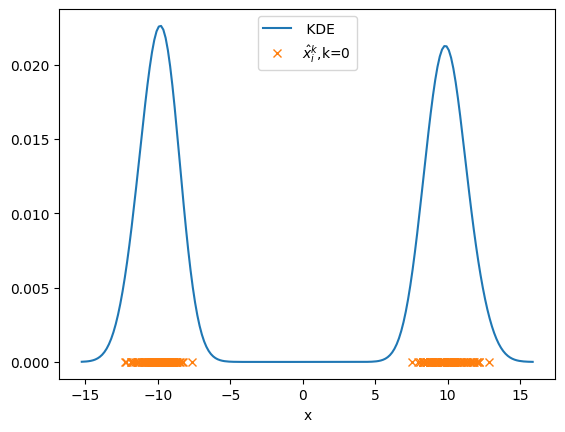

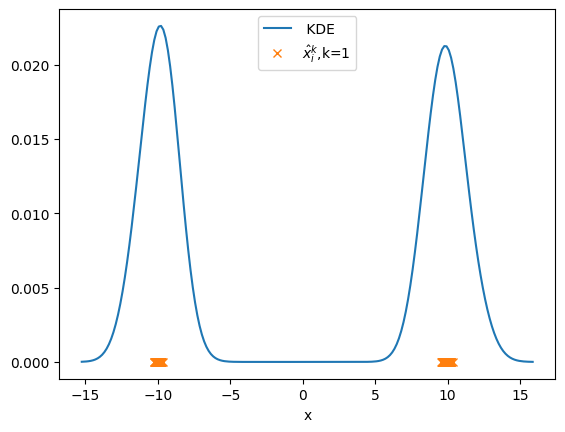

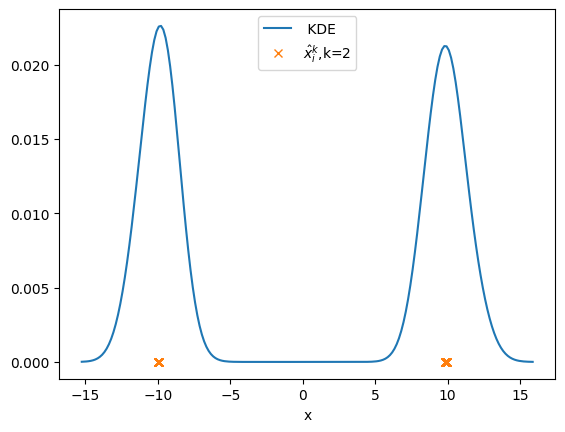

In [44]:
Xhat=np.copy(S.reshape(-1,1))
S_=S.reshape(-1,1)


for k in range(3):
    plt.plot(x,density,label=" KDE")
    plt.plot(Xhat,np.zeros((200,1)),'x',label="$\hat{x}^{k}_i$,k="+str(k))
    plt.xlabel('x')
    plt.legend()
    plt.show()

    for i,xhat in enumerate(Xhat):
        dist=np.sqrt(((xhat-S_)**2).sum(1))
        weight = gaussian(dist, 2.5)
        Xhat[i] = (weight.reshape(-1,1)*S_).sum(0) / weight.sum()

In [45]:
np.unique(Xhat.astype(int))

array([-9,  9])